In [1]:
!pip install scikit-learn matplotlib
!pip install torch
!pip uninstall -y transformers datasets
!pip install transformers datasets
!pip install --upgrade datasets transformers


Found existing installation: transformers 4.47.0
Uninstalling transformers-4.47.0:
  Successfully uninstalled transformers-4.47.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


<ipython-input-3-323bded4f67c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


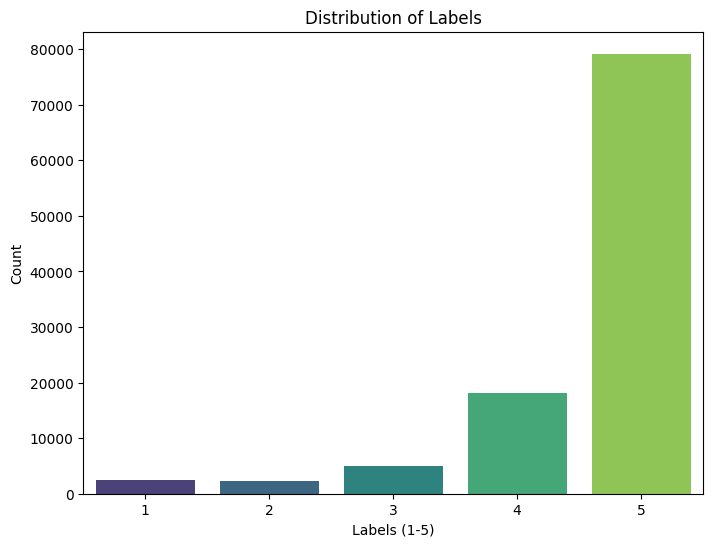

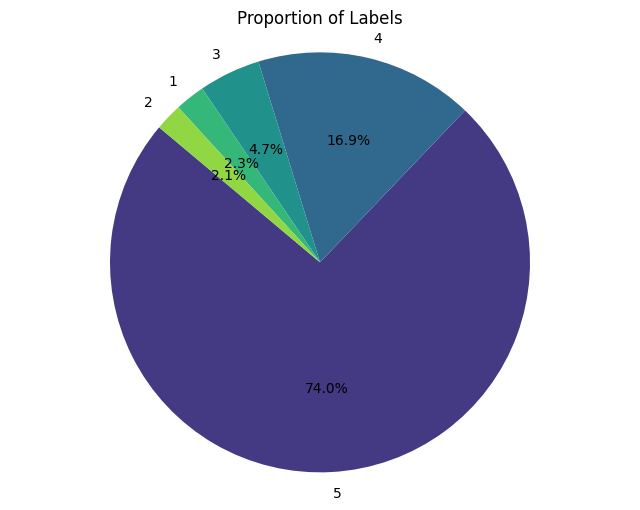

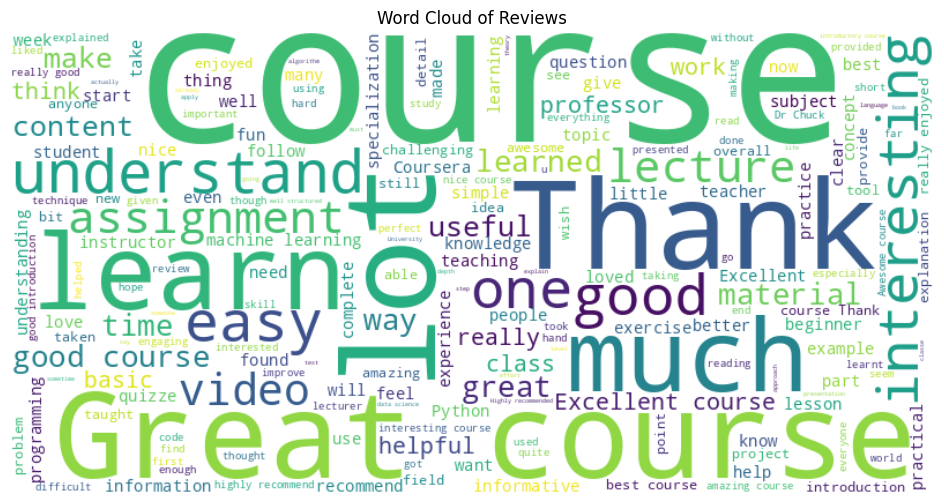

<ipython-input-3-323bded4f67c>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='Review_Length', data=data, palette="coolwarm")


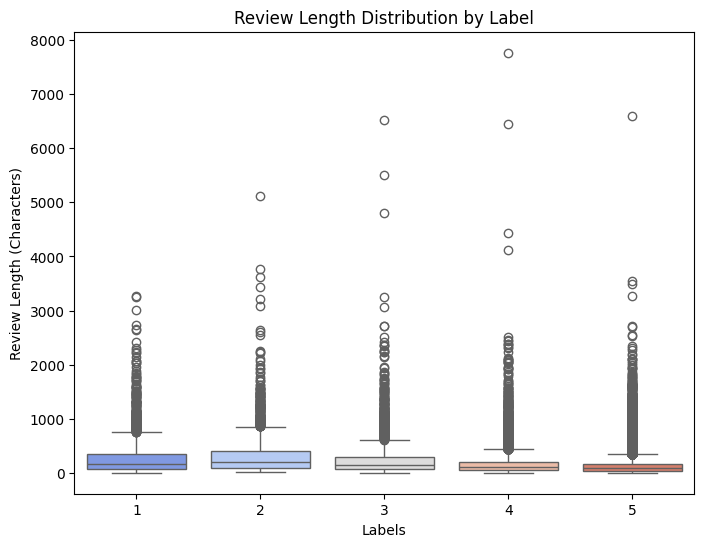

<ipython-input-3-323bded4f67c>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lengths.index, y=avg_lengths.values, palette="mako")


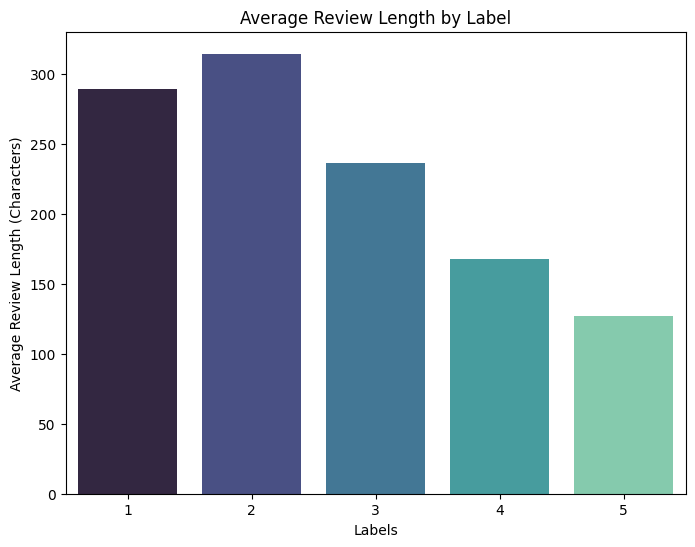

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
data = pd.read_csv("reviews.csv")  # Replace with your dataset file
data = data[['Review', 'Label']]  # Ensure these columns exist in your dataset

# Visualization 1: Distribution of Labels (Bar Plot)
def plot_label_distribution(data):
    label_counts = data['Label'].value_counts().sort_index()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
    plt.title("Distribution of Labels")
    plt.xlabel("Labels (1-5)")
    plt.ylabel("Count")
    plt.xticks([0, 1, 2, 3, 4], labels=["1", "2", "3", "4", "5"])
    plt.show()

# Visualization 2: Distribution of Labels (Pie Chart)
def plot_label_pie_chart(data):
    label_counts = data['Label'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(label_counts)))
    plt.title("Proportion of Labels")
    plt.axis('equal')
    plt.show()

# Visualization 3: Word Cloud of Reviews
def plot_word_cloud(data):
    text = " ".join(review for review in data['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Reviews")
    plt.show()

# Visualization 4: Length of Reviews by Label
def plot_review_length_distribution(data):
    data['Review_Length'] = data['Review'].apply(len)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Label', y='Review_Length', data=data, palette="coolwarm")
    plt.title("Review Length Distribution by Label")
    plt.xlabel("Labels")
    plt.ylabel("Review Length (Characters)")
    plt.show()

# Visualization 5: Average Review Length by Label
def plot_avg_review_length(data):
    data['Review_Length'] = data['Review'].apply(len)
    avg_lengths = data.groupby('Label')['Review_Length'].mean()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=avg_lengths.index, y=avg_lengths.values, palette="mako")
    plt.title("Average Review Length by Label")
    plt.xlabel("Labels")
    plt.ylabel("Average Review Length (Characters)")
    plt.show()

# Call all visualizations
plot_label_distribution(data)
plot_label_pie_chart(data)
plot_word_cloud(data)
plot_review_length_distribution(data)
plot_avg_review_length(data)


Class Imbalances handling

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in ve

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.970700,0.992005,0.775696,0.774554,0.778941,0.775696
2,0.880100,1.072045,0.743412,0.759752,0.786095,0.743412
3,0.705300,1.141850,0.746216,0.762608,0.787355,0.746216


Evaluation Results: {'eval_loss': 0.9920053482055664, 'eval_accuracy': 0.7756961315641936, 'eval_f1': 0.774553597992124, 'eval_precision': 0.7789413395088199, 'eval_recall': 0.7756961315641936, 'eval_runtime': 181.01, 'eval_samples_per_second': 118.248, 'eval_steps_per_second': 1.851, 'epoch': 3.0}


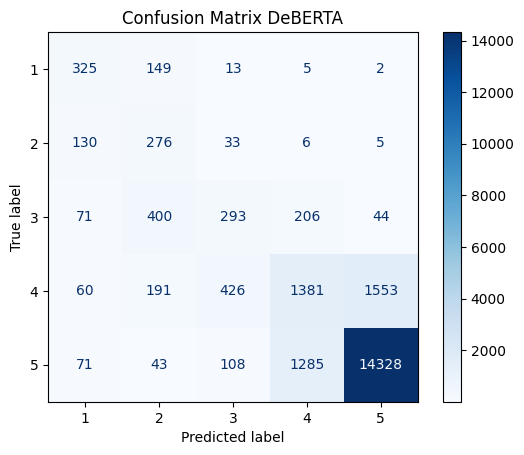

╒══════════════════════════════════════════════════════════════════════════════════╤═══════════════════╕
│ Example Review                                                                   │   Predicted Label │
╞══════════════════════════════════════════════════════════════════════════════════╪═══════════════════╡
│ This course was excellent! The instructor was very knowledgeable and helpful.    │                 5 │
├──────────────────────────────────────────────────────────────────────────────────┼───────────────────┤
│ The course was okay, but the assignments were too difficult to complete on time. │                 3 │
├──────────────────────────────────────────────────────────────────────────────────┼───────────────────┤
│ Absolutely terrible course. The lectures were confusing and unstructured.        │                 1 │
├──────────────────────────────────────────────────────────────────────────────────┼───────────────────┤
│ The content was good, but the pacing of the course wa

In [4]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
import os
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Disable Weights & Biases logging
os.environ["WANDB_DISABLED"] = "true"

# Load dataset
data = pd.read_csv("/content/gdrive/MyDrive/reviews.csv")
data = data[['Review', 'Label']]  # Ensure these columns exist in your dataset

# Adjust labels to be 0-indexed for PyTorch compatibility
data['Label'] = data['Label'] - 1

# Train-test split with stratification to maintain class proportions in both sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['Review'], data['Label'], test_size=0.2, random_state=42, stratify=data['Label']
)

# Tokenizer setup
model_name = "microsoft/deberta-v3-base"  # Use DeBERTa
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the data
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)

# PyTorch Dataset
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SentimentDataset(train_encodings, list(train_labels))
val_dataset = SentimentDataset(val_encodings, list(val_labels))

# Compute class weights to handle imbalance
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(data['Label']),
    y=data['Label']
)

# Convert class weights to a tensor for PyTorch
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

# Load pretrained model with the ability to handle weighted loss
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=5
)

# Override the Trainer's compute_loss method to include weighted loss
from transformers import Trainer

class WeightedLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None): # Add num_items_in_batch
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights_tensor.to(model.device))
        loss = loss_fn(logits, labels)
        return (loss, outputs) if return_outputs else loss

# Define metrics for evaluation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Training arguments with added evaluation
training_args = TrainingArguments(
    output_dir="./DeBERT_results",
    num_train_epochs=3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    learning_rate=2e-5,
    report_to="none"  # Ensure no logging to wandb or other trackers
)

# Instantiate the Trainer with weighted loss
trainer = WeightedLossTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Save the fine-tuned model
model.save_pretrained("./DeBERT_model")
tokenizer.save_pretrained("./DeBERT_model")

# Evaluate the model
evaluation_results = trainer.evaluate()
print("Evaluation Results:", evaluation_results)

# Plot Confusion Matrix for better visualization
def plot_confusion_matrix(trainer, val_dataset):
    predictions = trainer.predict(val_dataset)
    preds = predictions.predictions.argmax(-1)
    cm = confusion_matrix(val_labels, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix DeBERTA")
    plt.show()

plot_confusion_matrix(trainer, val_dataset)

# Prediction function for new reviews
def DeBERT_predict_sentiment(review):
    inputs = tokenizer(review, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {key: val.to(model.device) for key, val in inputs.items()}
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
    prediction = torch.argmax(outputs.logits, dim=1).item()
    return prediction + 1  # Convert 0-indexed label back to 1-indexed

# Example reviews for prediction
example_reviews = [
    "This course was excellent! The instructor was very knowledgeable and helpful.",
    "The course was okay, but the assignments were too difficult to complete on time.",
    "Absolutely terrible course. The lectures were confusing and unstructured.",
    "The content was good, but the pacing of the course was way too fast.",
    "An amazing learning experience! The projects were challenging yet rewarding."
]

# Predict sentiments for example reviews
predicted_labels = [DeBERT_predict_sentiment(review) for review in example_reviews]
results_df = pd.DataFrame({
    "Example Review": example_reviews,
    "Predicted Label": predicted_labels
})
print(tabulate(results_df, headers="keys", tablefmt="fancy_grid", showindex=False))


**Actual CODE**

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in ve

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.493100,0.494310,0.810409,0.792588,0.790009,0.810409


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.493100,0.494310,0.810409,0.792588,0.790009,0.810409
2,0.449900,0.482289,0.817277,0.803017,0.797332,0.817277
3,0.408500,0.500961,0.816389,0.801303,0.796261,0.816389



DeBERTa Actual vs Predicted Labels
╒══════════════════════════════════════════════════════════════════════════════════╤════════════════╤═══════════════════╕
│ Example Review                                                                   │   Actual Label │   Predicted Label │
╞══════════════════════════════════════════════════════════════════════════════════╪════════════════╪═══════════════════╡
│ This course was excellent! The instructor was very knowledgeable and helpful.    │              5 │                 5 │
├──────────────────────────────────────────────────────────────────────────────────┼────────────────┼───────────────────┤
│ The course was okay, but the assignments were too difficult to complete on time. │              3 │                 3 │
├──────────────────────────────────────────────────────────────────────────────────┼────────────────┼───────────────────┤
│ Absolutely terrible course. The lectures were confusing and unstructured.        │              1 │         

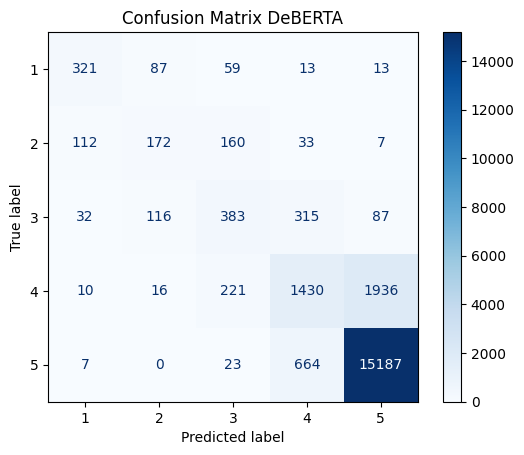

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import os
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Disable Weights & Biases logging
os.environ["WANDB_DISABLED"] = "true"

# Load dataset
data = pd.read_csv("reviews.csv")  # Replace with your dataset file
data = data[['Review', 'Label']]  # Ensure these columns exist in your dataset

# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['Review'], data['Label'] - 1, test_size=0.2, random_state=42
)

# Tokenizer setup
model_name = "microsoft/deberta-v3-base"  # Use DeBERTa
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the data
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)

# PyTorch Dataset
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SentimentDataset(train_encodings, list(train_labels))
val_dataset = SentimentDataset(val_encodings, list(val_labels))

# Load pretrained model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)

# Define metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Training arguments with wandb disabled
training_args = TrainingArguments(
    output_dir="./DeBERT_results",
    num_train_epochs=3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    learning_rate=2e-5,
    report_to="none"  # Ensure no logging to wandb or other trackers
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Save the fine-tuned model
model.save_pretrained("./DeBert_model")
tokenizer.save_pretrained("./DeBert_model")

# Evaluate the model
trainer.evaluate()

# Set the device to CUDA if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the fine-tuned model and tokenizer for inference
model = AutoModelForSequenceClassification.from_pretrained("./DeBert_model")  # Path to your saved model
tokenizer = AutoTokenizer.from_pretrained("./DeBert_model")  # Path to your saved tokenizer

# Move the model to the correct device
model.to(device)

# Prediction function
def DeBERT_predict_sentiment(review):
    # Tokenize the input
    inputs = tokenizer(review, return_tensors="pt", truncation=True, padding=True, max_length=128)

    # Move inputs to the same device as the model
    inputs = {key: val.to(device) for key, val in inputs.items()}

    # Set the model to evaluation mode
    model.eval()

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the predicted class
    prediction = torch.argmax(outputs.logits, dim=1).item()
    return prediction + 1  # Convert 0-indexed label to 1-indexed


# Example reviews for prediction
example_reviews = [
    "This course was excellent! The instructor was very knowledgeable and helpful.",
    "The course was okay, but the assignments were too difficult to complete on time.",
    "Absolutely terrible course. The lectures were confusing and unstructured.",
    "The content was good, but the pacing of the course was way too fast.",
    "An amazing learning experience! The projects were challenging yet rewarding."
]

# Actual labels for example reviews
actual_labels = [5, 3, 1, 3, 5]  # Provided actual labels for the example reviews

# Predict sentiments for example reviews
predicted_labels = [DeBERT_predict_sentiment(review) for review in example_reviews]

# Create a DataFrame for actual vs predicted labels
results_df = pd.DataFrame({
    "Example Review": example_reviews,
    "Actual Label": actual_labels,
    "Predicted Label": predicted_labels
})

# Use tabulate to display the table neatly
print("\nDeBERTa Actual vs Predicted Labels")
print(tabulate(results_df, headers="keys", tablefmt="fancy_grid", showindex=False))


# Confusion Matrix for BERT
def plot_confusion_matrix(trainer, val_dataset):
    predictions = trainer.predict(val_dataset)
    preds = predictions.predictions.argmax(-1)
    cm = confusion_matrix(val_labels, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix DeBERTA")
    plt.show()

plot_confusion_matrix(trainer, val_dataset)

import numpy as np
# Extract per-epoch logs from the training process
def extract_epoch_logs(trainer_state):
    logs = {
        "epoch": [],
        "training_loss": [],
        "validation_loss": [],
        "training_accuracy": [],
        "validation_accuracy": []
    }
    epoch_training_losses = []
    epoch_training_preds = []
    epoch_training_labels = []
    current_epoch = None

    for log in trainer_state.log_history:
        # Collect batch-wise training losses and predictions
        if "loss" in log and "epoch" in log:
            if current_epoch is None or current_epoch == log["epoch"]:
                epoch_training_losses.append(log["loss"])
                if "training_preds" in log and "training_labels" in log:
                    epoch_training_preds.extend(log["training_preds"])
                    epoch_training_labels.extend(log["training_labels"])
            else:
                # Average the training losses and calculate accuracy for the completed epoch
                logs["training_loss"].append(np.mean(epoch_training_losses))
                if epoch_training_preds and epoch_training_labels:
                    train_accuracy = accuracy_score(epoch_training_labels, epoch_training_preds)
                    logs["training_accuracy"].append(train_accuracy)
                epoch_training_losses = [log["loss"]]  # Reset for the next epoch
                epoch_training_preds = []
                epoch_training_labels = []

            current_epoch = log["epoch"]

        # Collect validation metrics at epoch-end
        if "eval_loss" in log and "epoch" in log:
            logs["epoch"].append(int(log["epoch"]))
            logs["validation_loss"].append(log["eval_loss"])
        if "eval_accuracy" in log and "epoch" in log:
            logs["validation_accuracy"].append(log["eval_accuracy"])

    # Add the last epoch's training loss and accuracy
    if epoch_training_losses:
        logs["training_loss"].append(np.mean(epoch_training_losses))
    if epoch_training_preds and epoch_training_labels:
        train_accuracy = accuracy_score(epoch_training_labels, epoch_training_preds)
        logs["training_accuracy"].append(train_accuracy)

    # Ensure alignment of logs
    max_epochs = len(logs["epoch"])
    logs["training_loss"] = logs["training_loss"][:max_epochs]
    logs["validation_loss"] = logs["validation_loss"][:max_epochs]
    logs["training_accuracy"] = logs["training_accuracy"][:max_epochs]
    logs["validation_accuracy"] = logs["validation_accuracy"][:max_epochs]

    return logs
# Retrieve logs
logs = extract_epoch_logs(trainer.state)


# Align epochs
epochs = range(1, len(logs["epoch"]) + 1)